

# Project: Investigating a TMDb Movie Dataset 

Investigation done by: Shubh

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>    
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> In this section I m going to focus on:-
  1. Which genre combination is most popular in year 2015?
  2. What kinds of properties are associated with movies that have high revenues?
  3. Are movies making profit?
  4. Which is the most popular and highly voted movie?
  5. Which property is important for deciding the future of the movie?
  
To investigate these questions we are going to analyze the given dataset and produce a fruitful outcome by:-
1. cleaning data
2. exploring that data
3. finally, interpreting this data through visuals to those questions.

Let's begin..

In [1]:
# This cell to set up import statements for all of the packages that I planned to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> TMDb movie dataset is downloaded from Kaggle


### General Properties

In [2]:
# Loading Data
df = df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Number of rows and columns in the dataset in the format => (rows, columns)
df.shape

(10866, 21)

In [4]:
# Number of non-empty cells of each attribute with their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Data types of the following attributes(or Columns) in separate manner
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


In [7]:
# Checking the dulicate rows
sum(df.duplicated())

1

> After reviewing the above information and description about the dataset I found that:-
  1. There are many empty cells in the attributes like homepage, tagline, etc.
  2. Also there are lots of irrelvent data which is not going to used.
  3. One row is also repeated.
  4. id must be of string data type but it is of int data type, so it should be changed. 

> Now, its time to clean the data.

### Data Cleaning 

> There are many empty cells across the attributes homepage, tagline, and keywords. 
> Also there are lots of irrelevent columns like homepage, tagline, keywords, overview, production_companies, and director(not   of our use). So, I m going to directly drop all these columns.

In [8]:
# Dropping the columns (with no use)
df = df.drop(columns={'director', 'production_companies', 'overview', 'homepage', 'keywords', 'tagline'})
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# Removing the duplicate rows
df.drop_duplicates(inplace=True)

# Checking the number of duplicates
sum(df.duplicated())

0

In [10]:
# Changing the format of id
df['id'] = df['id'].astype(str)
df['id'].dtypes

dtype('O')

In [11]:
# 0 values in runtime
print('Runtime    -', len(df[df.runtime==0]))

# 0 values in budget
print('Budget     -', len(df[df.budget==0]))

# 0 values in budget_adj
print('Budget_adj -', len(df[df.budget_adj==0]))

# 0 values in revenue
print('Revenue    -', len(df[df.revenue==0]))

# 0 values in revenue_adj
print('Revenue_adj-', len(df[df.revenue_adj==0]))

Runtime    - 31
Budget     - 5696
Budget_adj - 5696
Revenue    - 6016
Revenue_adj- 6016


In [12]:
# Replacing all the 0 values with their column mean
df.replace(0,df.mean(axis=0),inplace=True)

# Checking 0 values in runtime
print('Runtime    -', len(df[df.runtime==0]))

# Checking 0 values in budget
print('Budget     -', len(df[df.budget==0]))

# Checking 0 values in budget_adj
print('Budget_adj -', len(df[df.budget_adj==0]))

# Checking 0 values in revenue
print('Revenue    -', len(df[df.revenue==0]))

# Checking 0 values in revenue_adj
print('Revenue_adj-', len(df[df.revenue_adj==0]))

Runtime    - 0
Budget     - 0
Budget_adj - 0
Revenue    - 0
Revenue_adj- 0


In [13]:
# Rechecking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                10865 non-null object
imdb_id           10855 non-null object
popularity        10865 non-null float64
budget            10865 non-null float64
revenue           10865 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
runtime           10865 non-null float64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(7), int64(2), object(6)
memory usage: 1.1+ MB


In [14]:
df = df.assign(genres=df['genres'].str.split("|")).explode('genres')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.0,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Now, its time to compute statistics and   
create visualizations with the goal of addressing the research questions that we had posed in the Introduction section. 

### 1. Which genre combination is most popular in year 2015?

Text(0.5, 0, 'Release Year')

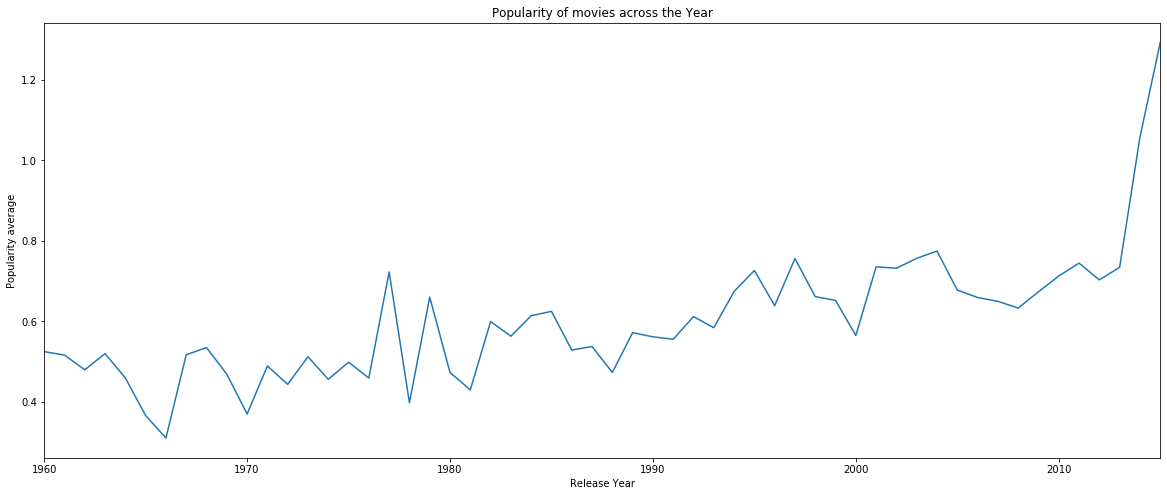

In [15]:
# Plotting graph
a=df.groupby('release_year').mean()['popularity'].plot(kind='line', figsize=(20,8), title='Popularity of movies across the Year');
a.set_ylabel("Popularity average")
a.set_xlabel("Release Year")

Text(0.5, 17.200000000000003, 'Genres')

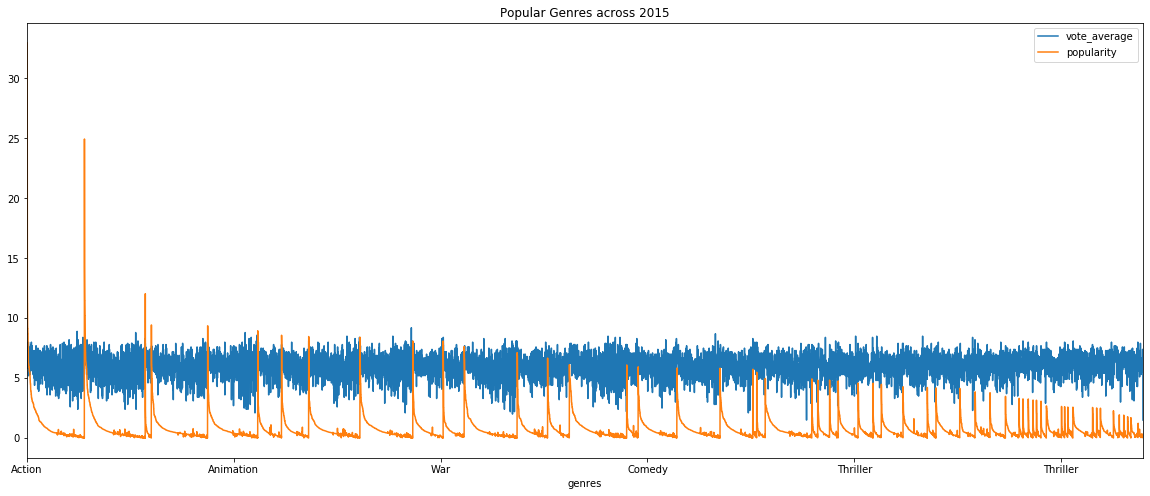

In [16]:
# Plotting graph
df.plot(x='genres', y={'popularity','vote_average'}, figsize=(20,8), title='Popular Genres across 2015');
a.set_xlabel("Genres")

> Since the popularity of the movies was booming in 2015, so let's consider small dataset of year 2015 and vote_average is not playing a major role, so we may not considering it. 

Text(0.5, 0, 'Genres')

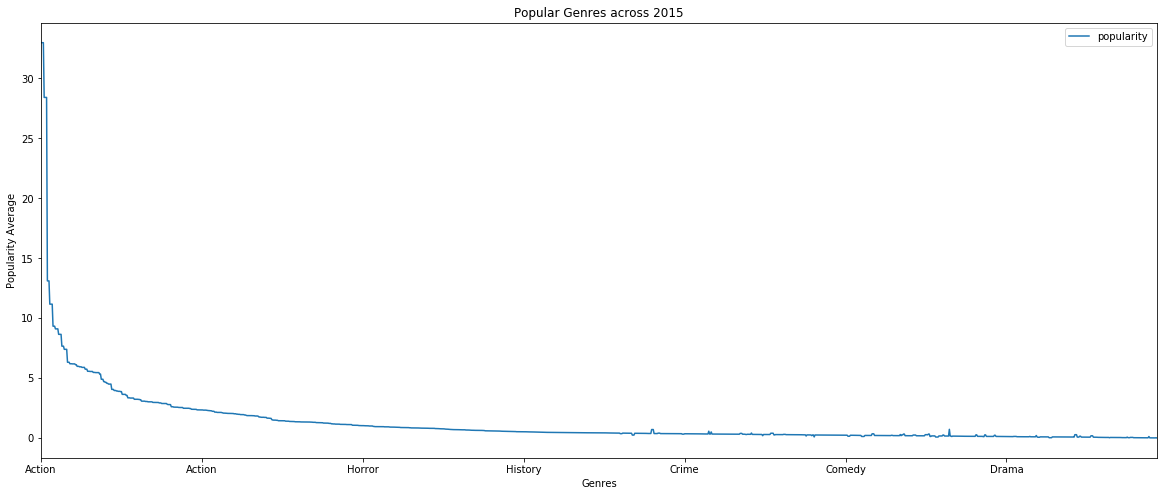

In [17]:
# Plotting graph
a = df[df['release_year']==2015].plot(x='genres', y='popularity', figsize=(20,8), title='Popular Genres across 2015');
a.set_ylabel("Popularity Average")
a.set_xlabel("Genres")

So, Action is the most popular genre in 2015.

### 2. What kinds of properties are associated with movies that have high revenues?
> Considering high revenue is beginning from 1 billion dollars

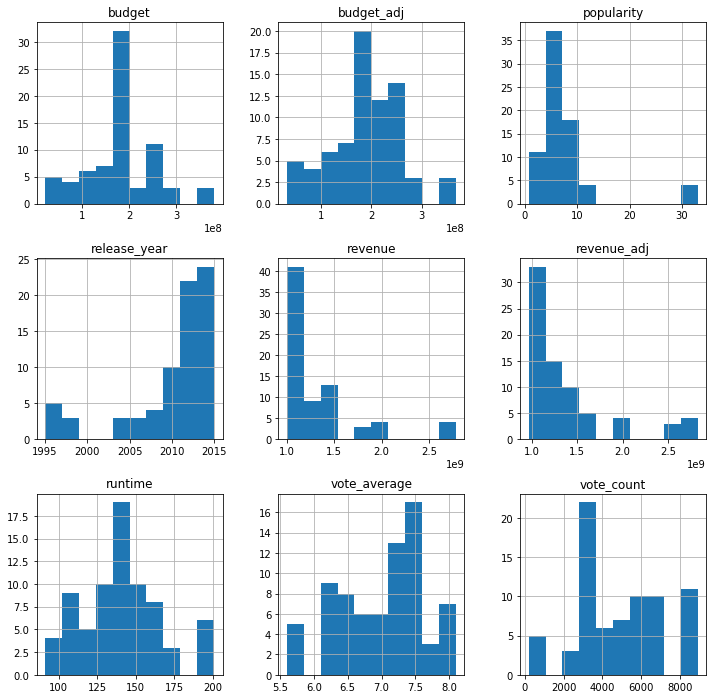

In [18]:
high_rev = df[df['revenue']>=1000000000]

# Creating Histograms of all the attributes of the dataset
high_rev.hist(figsize=(12,12));

The above histograms are representing properties of a high revenue grossing movies.    

In [19]:
high_rev.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,74.000000,7.400000e+01,7.400000e+01,74.000000,74.000000,74.000000,74.000000,7.400000e+01,7.400000e+01
mean,7.398372,1.857568e+08,1.349400e+09,139.405405,4773.297297,7.010811,2009.783784,1.838322e+08,1.372460e+09
std,6.692359,7.556596e+07,4.458963e+08,27.370076,2335.360256,0.651987,5.744015,7.338665e+07,4.915558e+08
min,0.760503,2.200000e+07,1.001922e+09,91.000000,201.000000,5.600000,1995.000000,3.148127e+07,9.658933e+08
25%,4.355219,1.500000e+08,1.069505e+09,124.000000,2947.000000,6.500000,2009.000000,1.386012e+08,1.052849e+09
50%,5.944927,2.000000e+08,1.140239e+09,137.000000,4654.000000,7.100000,2011.500000,1.890326e+08,1.192711e+09
75%,8.259443,2.200000e+08,1.506249e+09,154.000000,6417.000000,7.500000,2013.000000,2.374361e+08,1.430505e+09
max,32.985763,3.800000e+08,2.781506e+09,201.000000,8903.000000,8.100000,2015.000000,3.683713e+08,2.827124e+09


> Above description about the high revenue set is revealing about all the properties which it depends on 

#### Properties:-
    1. The minimum budget of the high revenue making movies is 22 million dollars.
    2. 75% popularity of the high revenue making movies is 7.579366.
    3. The minimum vote average of the high revenue making movies is 5.60.
    4. 50% of runtime of these kind of movies is 153.50 minutes.
   
> Ideally, cast's popularity and genre is also matters but in this case we are not considering it. 



### 3.  Are movies making profit?

Text(0.5, 0, 'Budget')

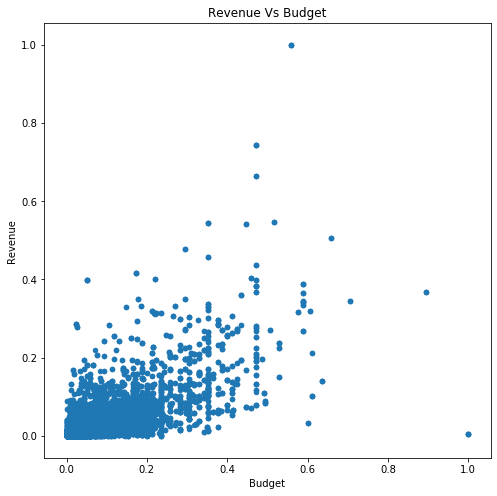

In [20]:
# Proportioning budget and revenue
df['budget'] = df['budget']/df['budget'].max()
df['revenue'] = df['revenue']/df['revenue'].max()

# Plotting
c = df.plot(x='budget', y='revenue', kind='scatter', figsize=(8,8), title='Revenue Vs Budget');
c.set_ylabel("Revenue")
c.set_xlabel("Budget")

The above graph is representing non-linear positive curve, as budget is increasing revenue is also increasing except some outliers(losses).

Text(0.5, 0, 'Budget(adj)')

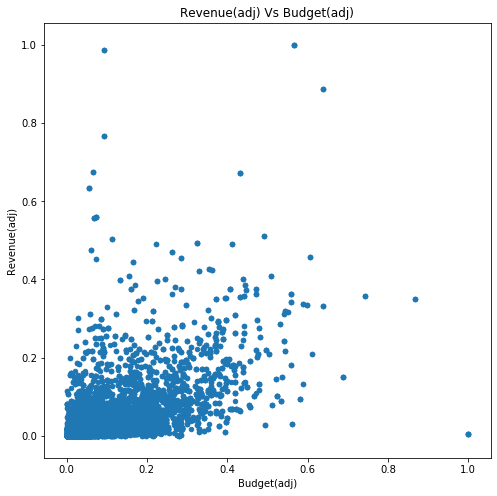

In [21]:
# Proportioning budget adjoint and revenue adjoint
df['revenue_adj'] = df['revenue_adj']/df['revenue_adj'].max()
df['budget_adj'] = df['budget_adj']/df['budget_adj'].max()

# Plotting
f = df.plot(x='budget_adj', y='revenue_adj', kind='scatter', figsize=(8,8), title='Revenue(adj) Vs Budget(adj)');
f.set_ylabel("Revenue(adj)")
f.set_xlabel("Budget(adj)")

Similarly, above graph is representing non-linear positive curve, as budget is increasing revenue is also increasing except some outliers(losses).

> At the end, after analyzing above two graphs we can say that movies are making profit, and very less are in loss.



### 4. Which is the most popular and highly voted movie?

In [22]:
df['popularity'].max()

32.985763

In [23]:
df[df['popularity']==32.985763]['original_title']

0    Jurassic World
0    Jurassic World
0    Jurassic World
0    Jurassic World
Name: original_title, dtype: object

In [24]:
df['vote_count'].max()

9767

In [25]:
df[df['vote_count']==9767]['original_title']

1919    Inception
1919    Inception
1919    Inception
1919    Inception
1919    Inception
Name: original_title, dtype: object

So, from above discussion we found
> Jurassic World is the most popular movie and, Inception is the most voted movie.



### 5. Which property is important for deciding the future of the movie?

In [26]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26978.000000,2.697800e+04,2.697800e+04,26978.000000,26978.000000,26978.000000,26978.000000,2.697800e+04,2.697800e+04
mean,0.705653,5.822065e-02,2.463938e-02,103.007578,249.801579,5.956932,2000.701794,6.993637e-02,3.116006e-02
std,1.114621,7.428725e-02,4.527369e-02,30.008637,637.784544,0.912318,12.764426,8.046733e-02,5.412416e-02
min,0.000065,2.352941e-09,7.190350e-10,2.000000,10.000000,1.500000,1960.000000,2.167273e-09,8.385573e-10
25%,0.224439,3.441008e-02,1.431847e-02,90.000000,18.000000,5.400000,1994.000000,4.129387e-02,1.817006e-02
50%,0.410850,3.441008e-02,1.431847e-02,100.000000,44.000000,6.000000,2005.000000,4.129387e-02,1.817006e-02
75%,0.774232,4.705882e-02,1.431847e-02,112.000000,173.000000,6.600000,2011.000000,6.362760e-02,1.817006e-02
max,32.985763,1.000000e+00,1.000000e+00,900.000000,9767.000000,9.200000,2015.000000,1.000000e+00,1.000000e+00


Text(0.5, 0, 'Number of Votes')

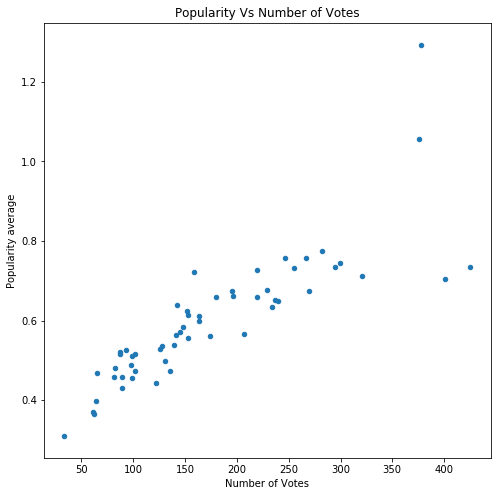

In [27]:
m = df.groupby('release_year').mean().plot(y='popularity',x ='vote_count', kind='scatter', title='Popularity Vs Number of Votes', figsize=(8,8));
m.set_ylabel("Popularity average")
m.set_xlabel("Number of Votes")

The above graph is representing linear positive line showing uniform balance between the number of votes and in their popularity. 
>**Higher the number of votes and higher popularity leads to the success of the movie!** 

From this we conclude votes and popularity leads to the great future of the movie.
Although, genre and movie cast is also important.

<a id='conclusions'></a>
## Conclusions

> 1. Action, Adventure, Science, Fiction and Thriller genre are most popular in year 2015.                 
**Limitation:** Although, Action, Adventure, Science, Fiction and Thriller genres in combination were in the most popular  movie, since we are considering most popular genre so we are not considering them. 

> 2. Properties that are associated with movies that have high revenues:-
            a. The minimum budget of the high revenue making movies is 22 million dollars.
            b. 75% popularity of the high revenue making movies is 7.579366.
            c. The minimum vote average of the high revenue making movies is 5.60.
            d. 50% of runtime of these kind of movies is 153.50 minutes.                                                      
   **Limitation:** Cast's popularity and genre is also matters but in this case we are not considering it.
 
> 3. Maximum movies are making profit, and very less are in loss.

> 4. Jurassic World is the most popular movie and, Inception is the most voted movie.

>5. Higher the number of votes and higher popularity leads to the success of the movie.     
**Limitation:** Popularity of star cast, genres, and storyline also matters in determining the future of the movie.
    
    
  

<a id='references'></a>
### References: N/A   